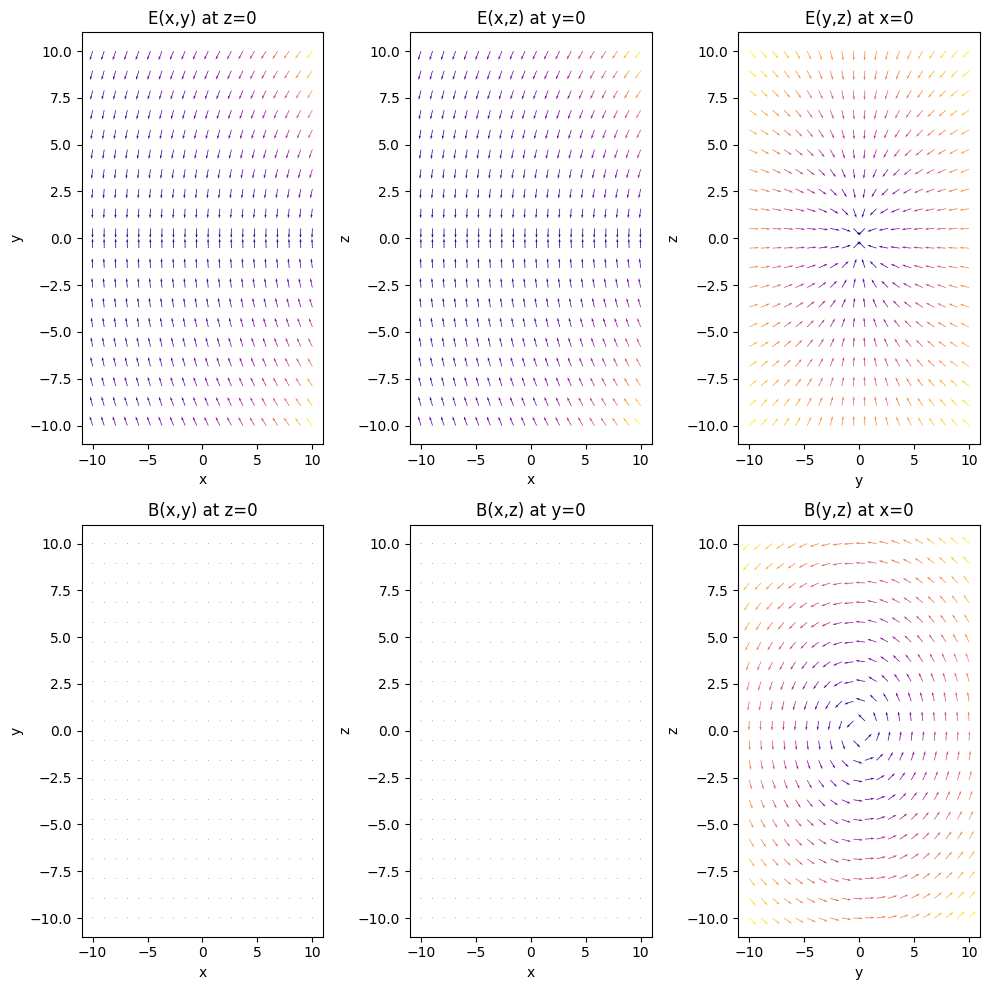

<Figure size 1000x1000 with 0 Axes>

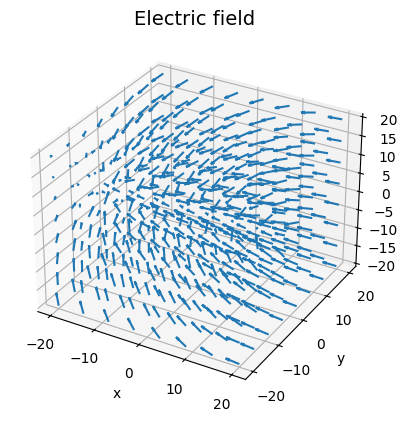

<Figure size 1000x1000 with 0 Axes>

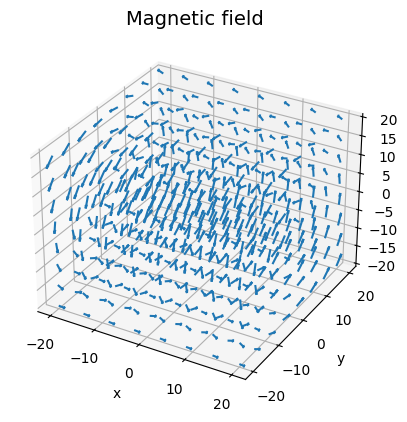

In [23]:
import numpy as np
import matplotlib.pyplot as plt

q = 1.0
c = 1.0
t_ret=1
beta=0.1
a0=0.3

def r_p(t):
    return np.array([beta*c*t,0,0.5*a0*t**2])

def v_p(t):
    return np.array([beta*c,0,a0*t])

def a_p(t):
    return np.array([0,0,a0])

def E_func(r_o):
    rp=r_p(t_ret);vp=v_p(t_ret);ap=a_p(t_ret)
    Rv=r_o-rp
    R=np.linalg.norm(Rv)
    n=Rv/R
    mpt=vp/c
    npe=ap/c
    kap=1.0-np.dot(n,mpt)
    numer=np.cross(n,np.cross(n-mpt,npe))
    E_rad=numer/((kap**3)*R)
    return E_rad

def B_func(r_o):
    E=E_func(r_o)
    rp=r_p(t_ret)
    Rv=r_o-rp
    n=Rv/(np.linalg.norm(Rv))
    B_rad=np.cross(n,E)
    return B_rad

nx=ny=nz=20
x=np.linspace(-10,10,20)
y=np.linspace(-10,10,20)
z=np.linspace(-10,10,20)
X,Y=np.meshgrid(x,y)

Ex1=np.zeros_like(X)
Ey1=np.zeros_like(X)
Ez1=np.zeros_like(X)
Bx1=np.zeros_like(X)
By1=np.zeros_like(X)
Bz1=np.zeros_like(X)
Ex2=np.zeros_like(X)
Ey2=np.zeros_like(X)
Ez2=np.zeros_like(X)
Bx2=np.zeros_like(X)
By2=np.zeros_like(X)
Bz2=np.zeros_like(X)

for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],Y[j,i],0])
        E1=E_func(r_o)
        Ex1[j,i],Ey1[j,i]=E1[0],E1[1]

for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],0,Y[j,i]])
        E2=E_func(r_o)
        Ex2[j,i],Ez1[j,i]=E2[0],E2[2]

for j in range(ny):
    for i in range(nx):
        r_o=np.array([0,X[j,i],Y[j,i]])
        E3=E_func(r_o)
        Ey2[j,i],Ez2[j,i]=E3[1],E3[2]


for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],Y[j,i],0])
        B1=B_func(r_o)
        Bx1[j,i],By1[j,i]=B1[0],B1[1]

for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],0,Y[j,i]])
        B2=B_func(r_o)
        Bx2[j,i],Bz1[j,i]=B2[0],B2[2]

for j in range(ny):
    for i in range(nx):
        r_o=np.array([0,X[j,i],Y[j,i]])
        B3=B_func(r_o)
        By2[j,i],Bz2[j,i]=B3[1],B3[2]


fig,ax=plt.subplots(2,3,figsize=(10,10))
mag1=np.hypot(Ex1,Ey1)
mag1[mag1==0.0]=1.0
ax[0,0].quiver(X,Y,Ex1/mag1,Ey1/mag1,mag1,cmap='plasma',scale=25)
ax[0,0].set_title("E(x,y) at z=0")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")
mag2=np.hypot(Ex2,Ez1)
mag2[mag2==0.0]=1.0
ax[0,1].quiver(X,Y,Ex2/mag2,Ez1/mag2,mag2,cmap='plasma',scale=25)
ax[0,1].set_title("E(x,z) at y=0")
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("z")
mag3=np.hypot(Ey2,Ez2)
mag3[mag3==0.0]=1.0
ax[0,2].quiver(X,Y,Ey2/mag3,Ez2/mag3,mag3,cmap='plasma',scale=25)
ax[0,2].set_title("E(y,z) at x=0")
ax[0,2].set_xlabel("y")
ax[0,2].set_ylabel("z")
mag4=np.hypot(Bx1,By1)
mag4[mag4==0.0]=1.0
ax[1,0].quiver(X,Y,Bx1/mag4,By1/mag4,mag4,cmap='plasma',scale=25)
ax[1,0].set_title("B(x,y) at z=0")
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("y")
mag5=np.hypot(Bx2,Bz1)
mag5[mag5==0.0]=1.0
ax[1,1].quiver(X,Y,Bx2/mag5,Bz1/mag5,mag5,cmap='plasma',scale=25)
ax[1,1].set_title("B(x,z) at y=0")
ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("z")
mag6=np.hypot(By2,Bz2)
mag6[mag6==0.0]=1.0
ax[1,2].quiver(X,Y,By2/mag6,Bz2/mag6,mag6,cmap='plasma',scale=25)
ax[1,2].set_title("B(y,z) at x=0")
ax[1,2].set_xlabel("y")
ax[1,2].set_ylabel("z")
plt.tight_layout()
plt.show()

#For the 3d plotting
Xd,Yd,Zd=np.meshgrid(np.linspace(-20,20,8),np.linspace(-20,20,8),np.linspace(-20,20,8))
Exd=np.zeros_like(Xd)
Eyd=np.zeros_like(Yd)
Ezd=np.zeros_like(Zd)
Bxd=np.zeros_like(Xd)
Byd=np.zeros_like(Yd)
Bzd=np.zeros_like(Zd)
for j in range(8):
    for i in range(8):
      for k in range (8):
        r_o=np.array([Xd[j,i,k],Yd[j,i,k],Zd[j,i,k]])
        Ed=E_func(r_o)
        Exd[j,i,k],Eyd[j,i,k],Ezd[j,i,k]=Ed[0],Ed[1],Ed[2]
        Bd=B_func(r_o)
        Bxd[j,i,k],Byd[j,i,k],Bzd[j,i,k]=Bd[0],Bd[1],Bd[2]

fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Exd,Eyd,Ezd,length=3,normalize=True)
ax.set_title("Electric field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()
fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Bxd,Byd,Bzd,length=3,normalize=True)
ax.set_title("Magnetic field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()